In [ ]:
!nvidia-smi

Sat Dec  9 10:46:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from ultralytics import YOLO
from IPython.display import Image, display

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2jYRjmgjPvTddp7eKlOr")
project = rf.workspace("university-donja-gorica").project("drugiprojekat")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to DrugiProjekat-1 in yolov8:: 100%|██████████| 504/504 [00:00<00:00, 6222.33it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
!yolo task = detect mode = train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 35 imgsz = 500 plots = True

100% 21.5M/21.5M [00:00<00:00, 157MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/DrugiProjekat-1/data.yaml, epochs=35, patience=50, batch=16, imgsz=500, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png	     train_batch350.jpg
confusion_matrix.png				   results.csv	     train_batch351.jpg
events.out.tfevents.1702118836.048d28b59986.591.0  results.png	     train_batch352.jpg
F1_curve.png					   train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					   train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					   train_batch2.jpg  weights


/content


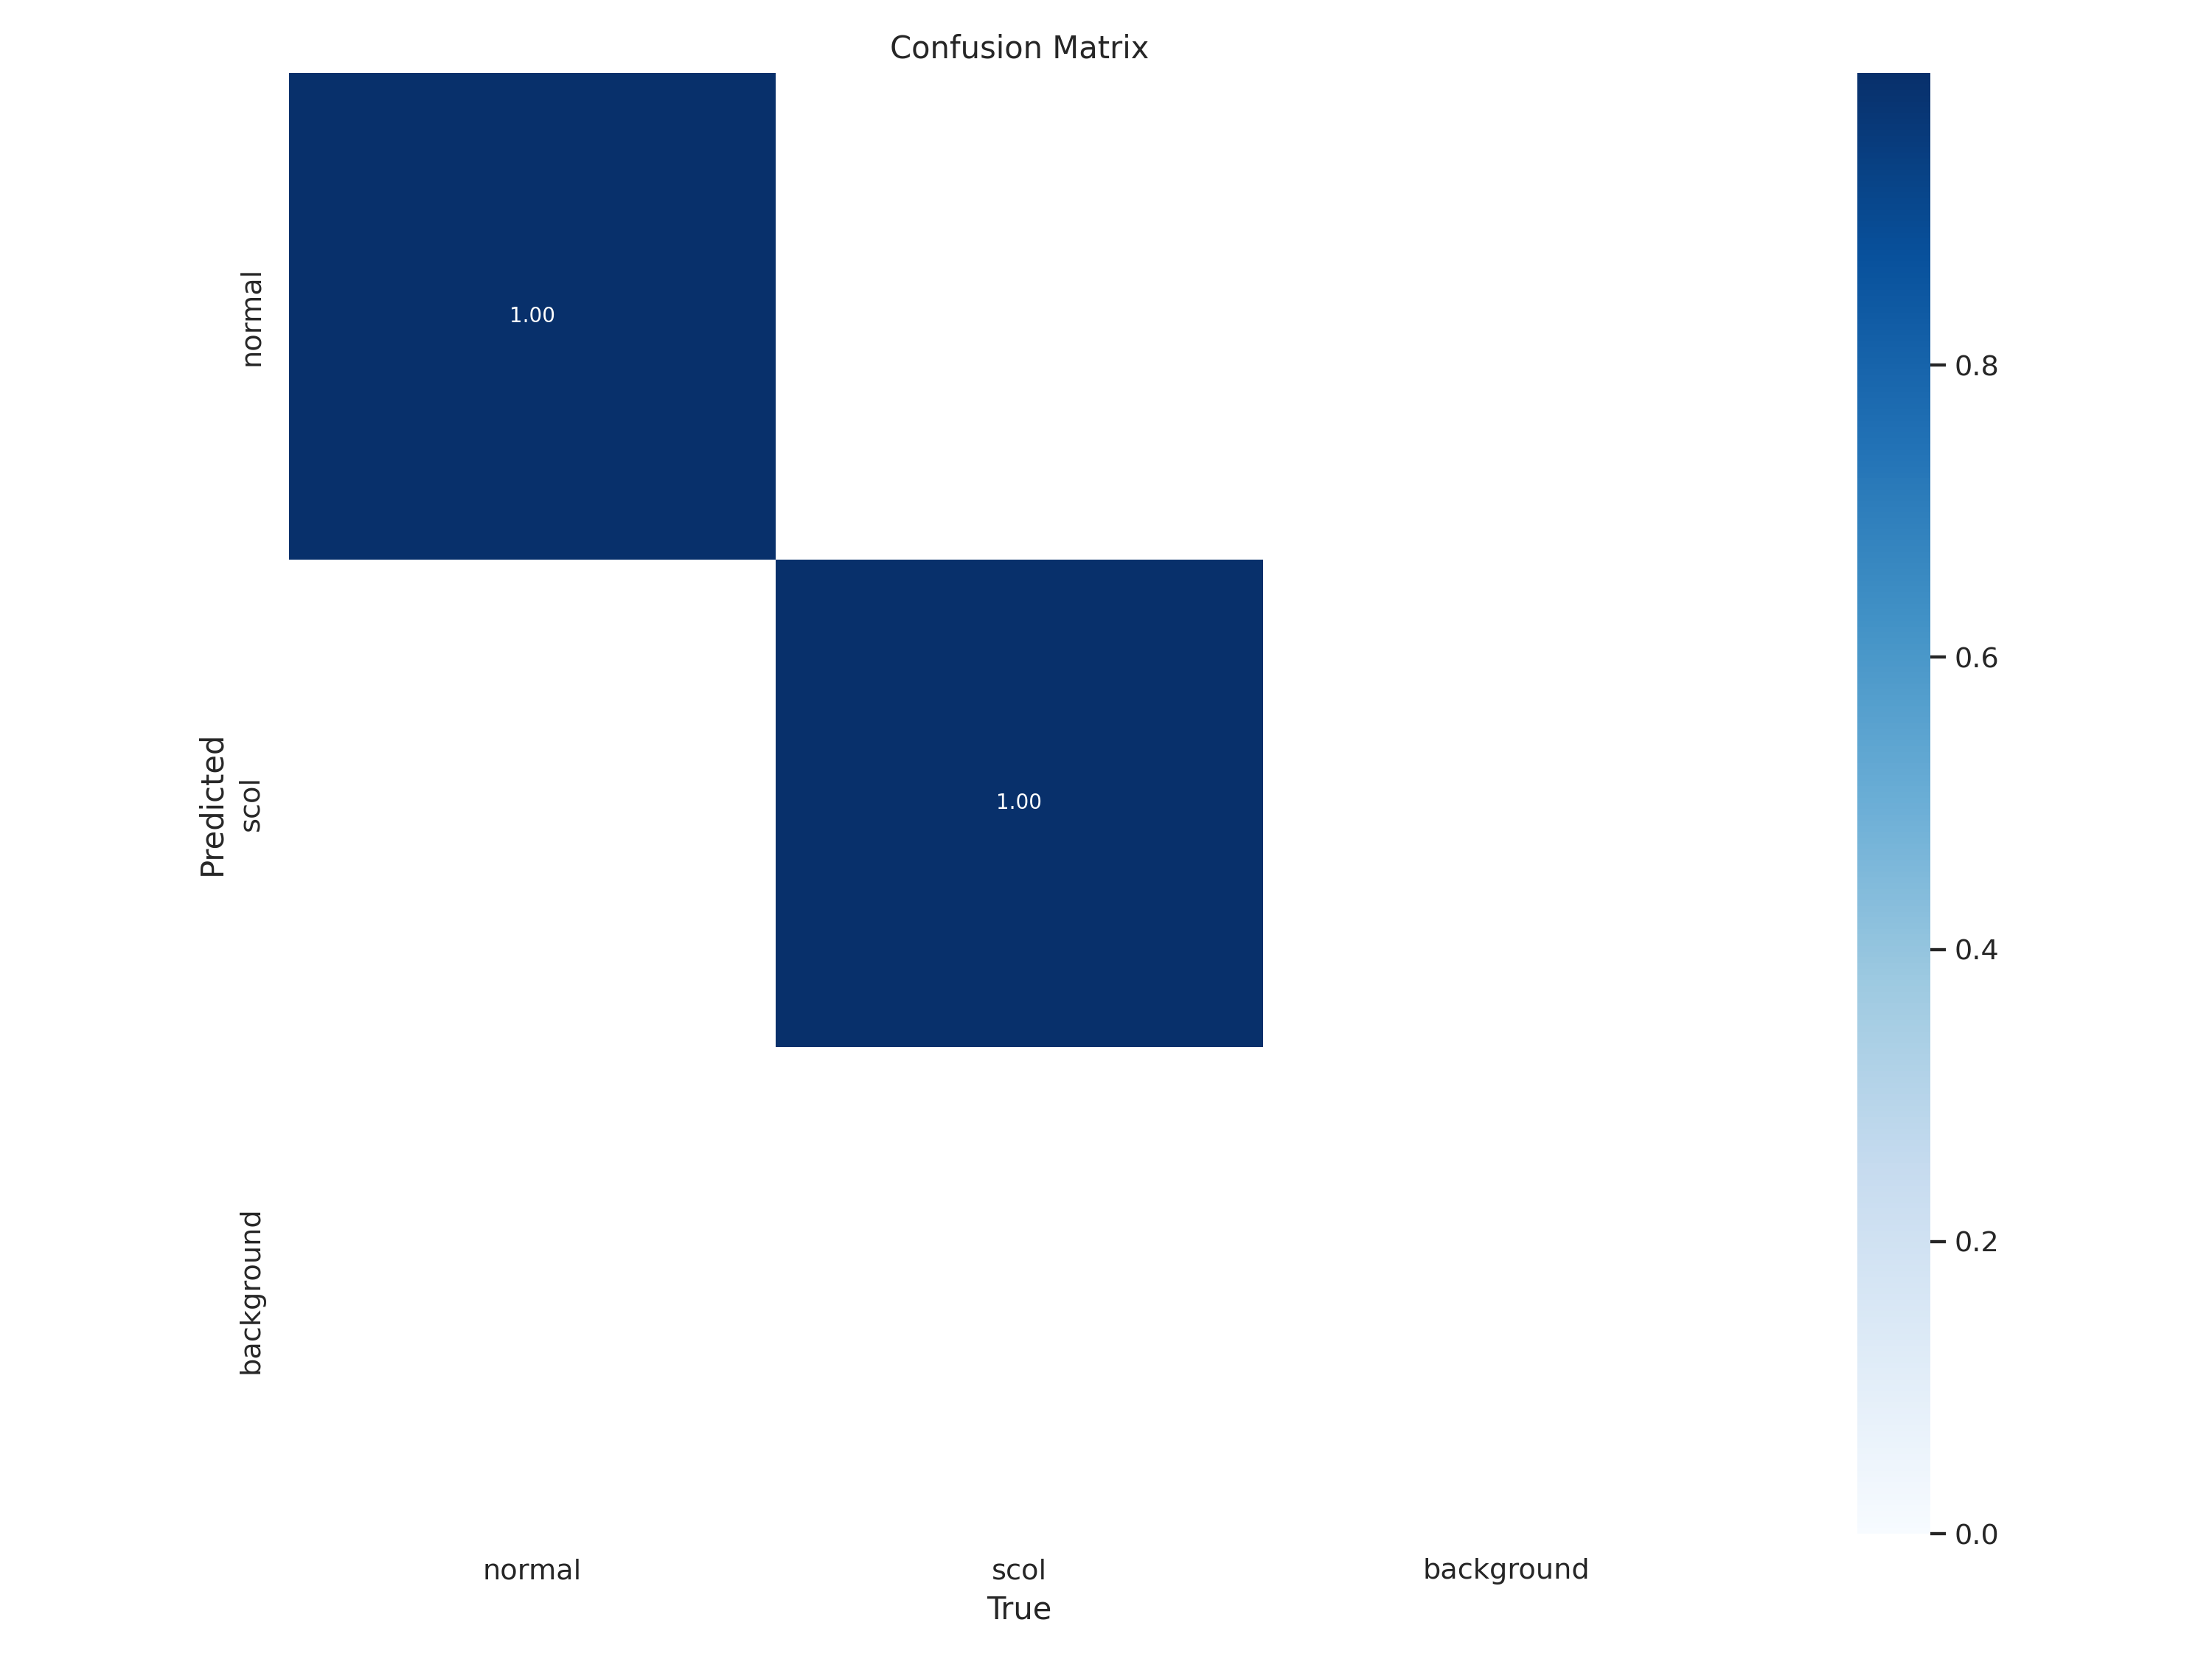

In [ ]:
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/train/confusion_matrix.png",width=600)

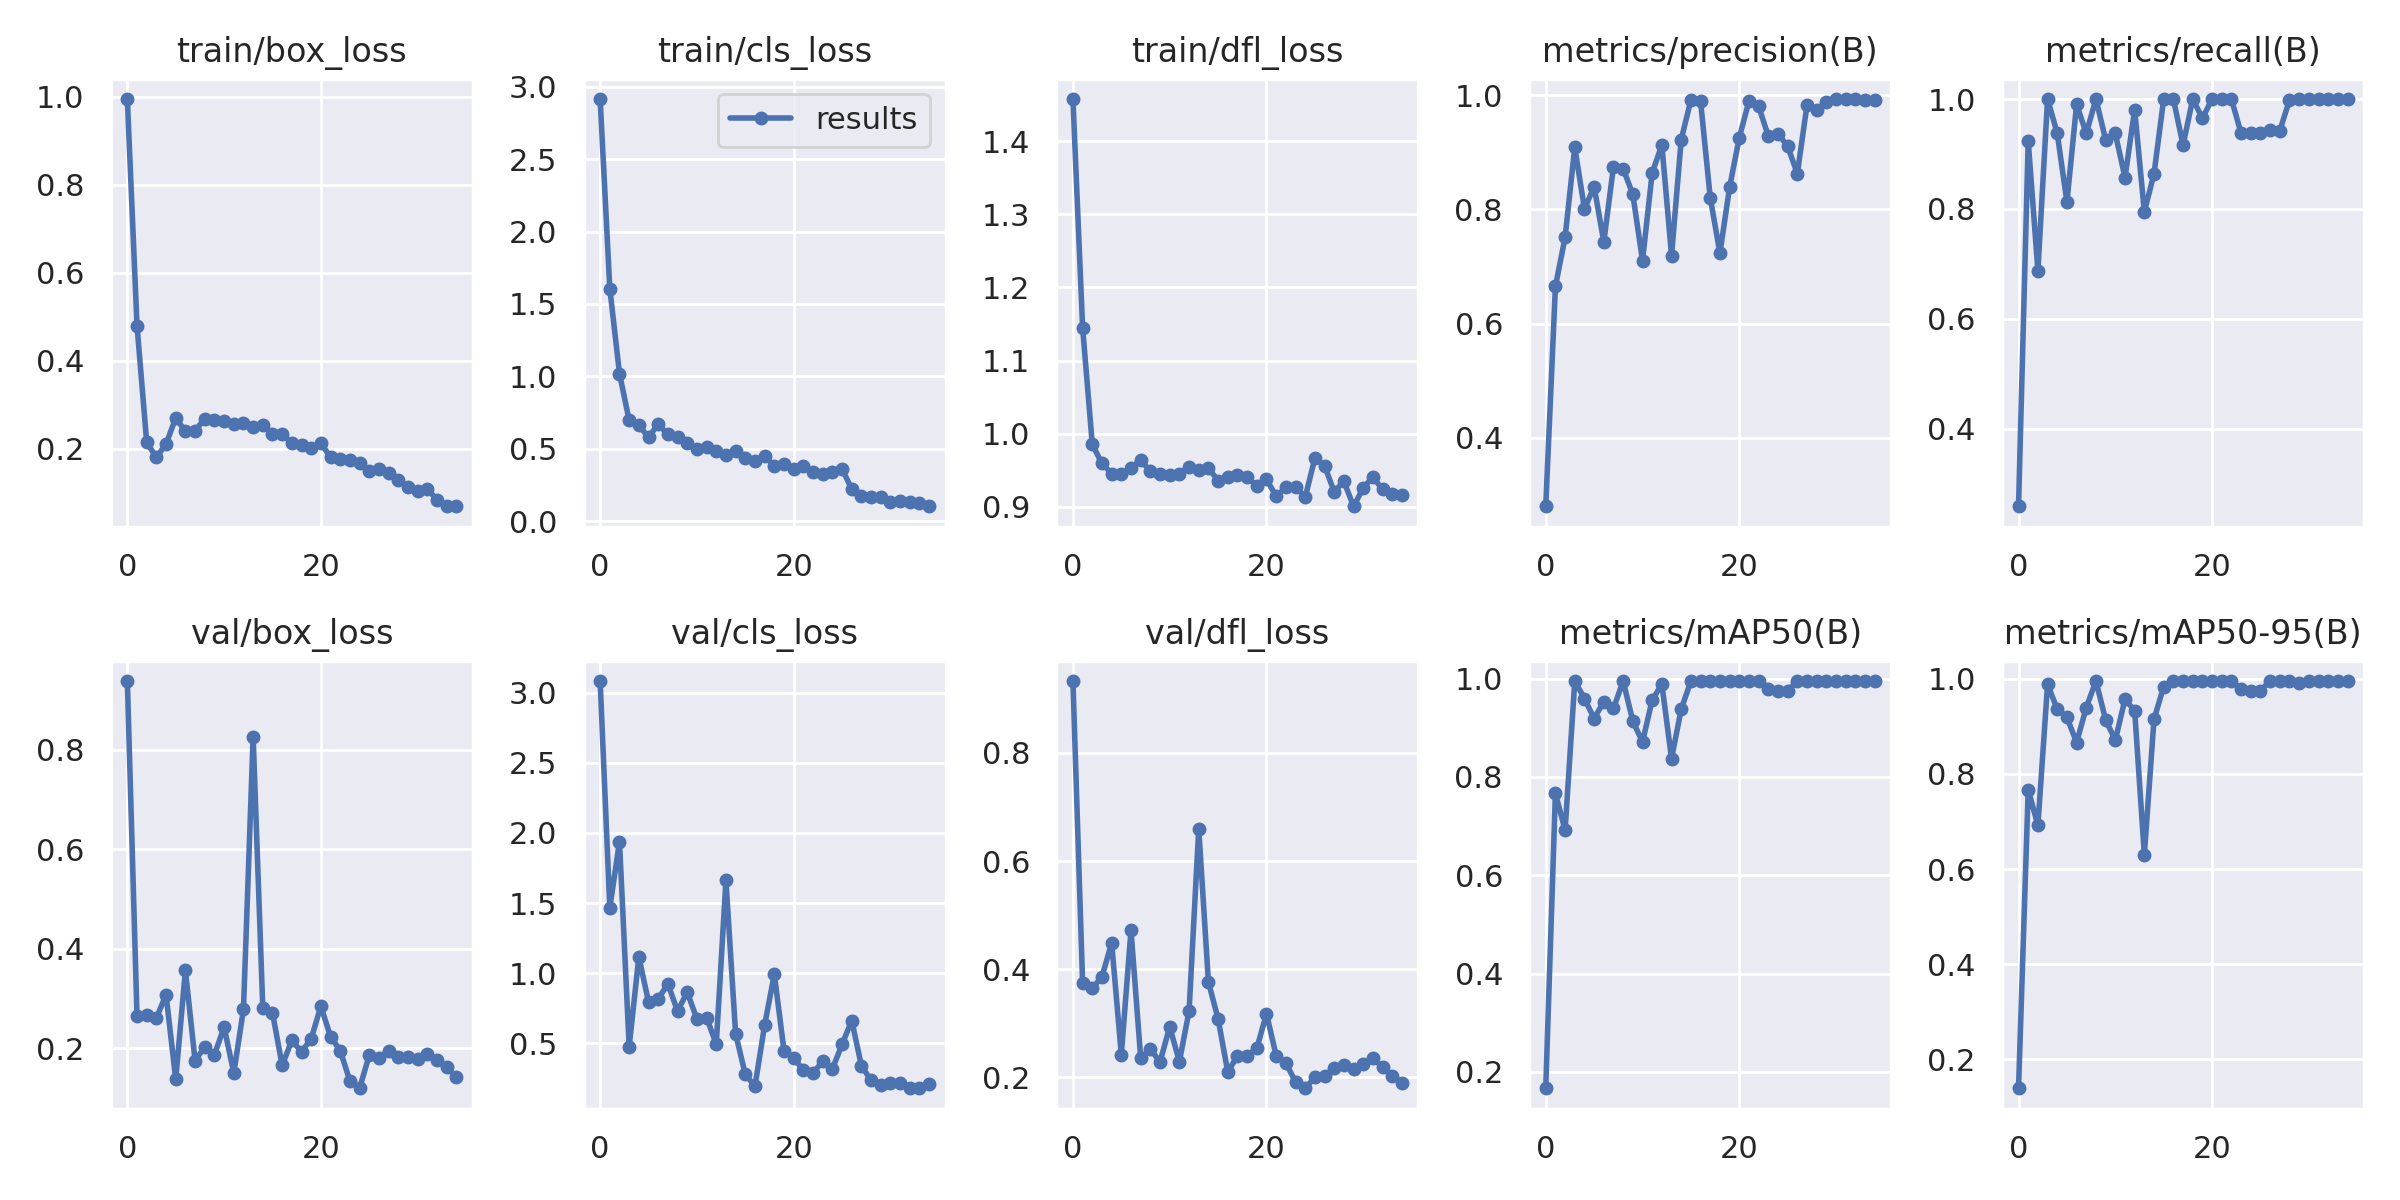

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/results.png",width=600)

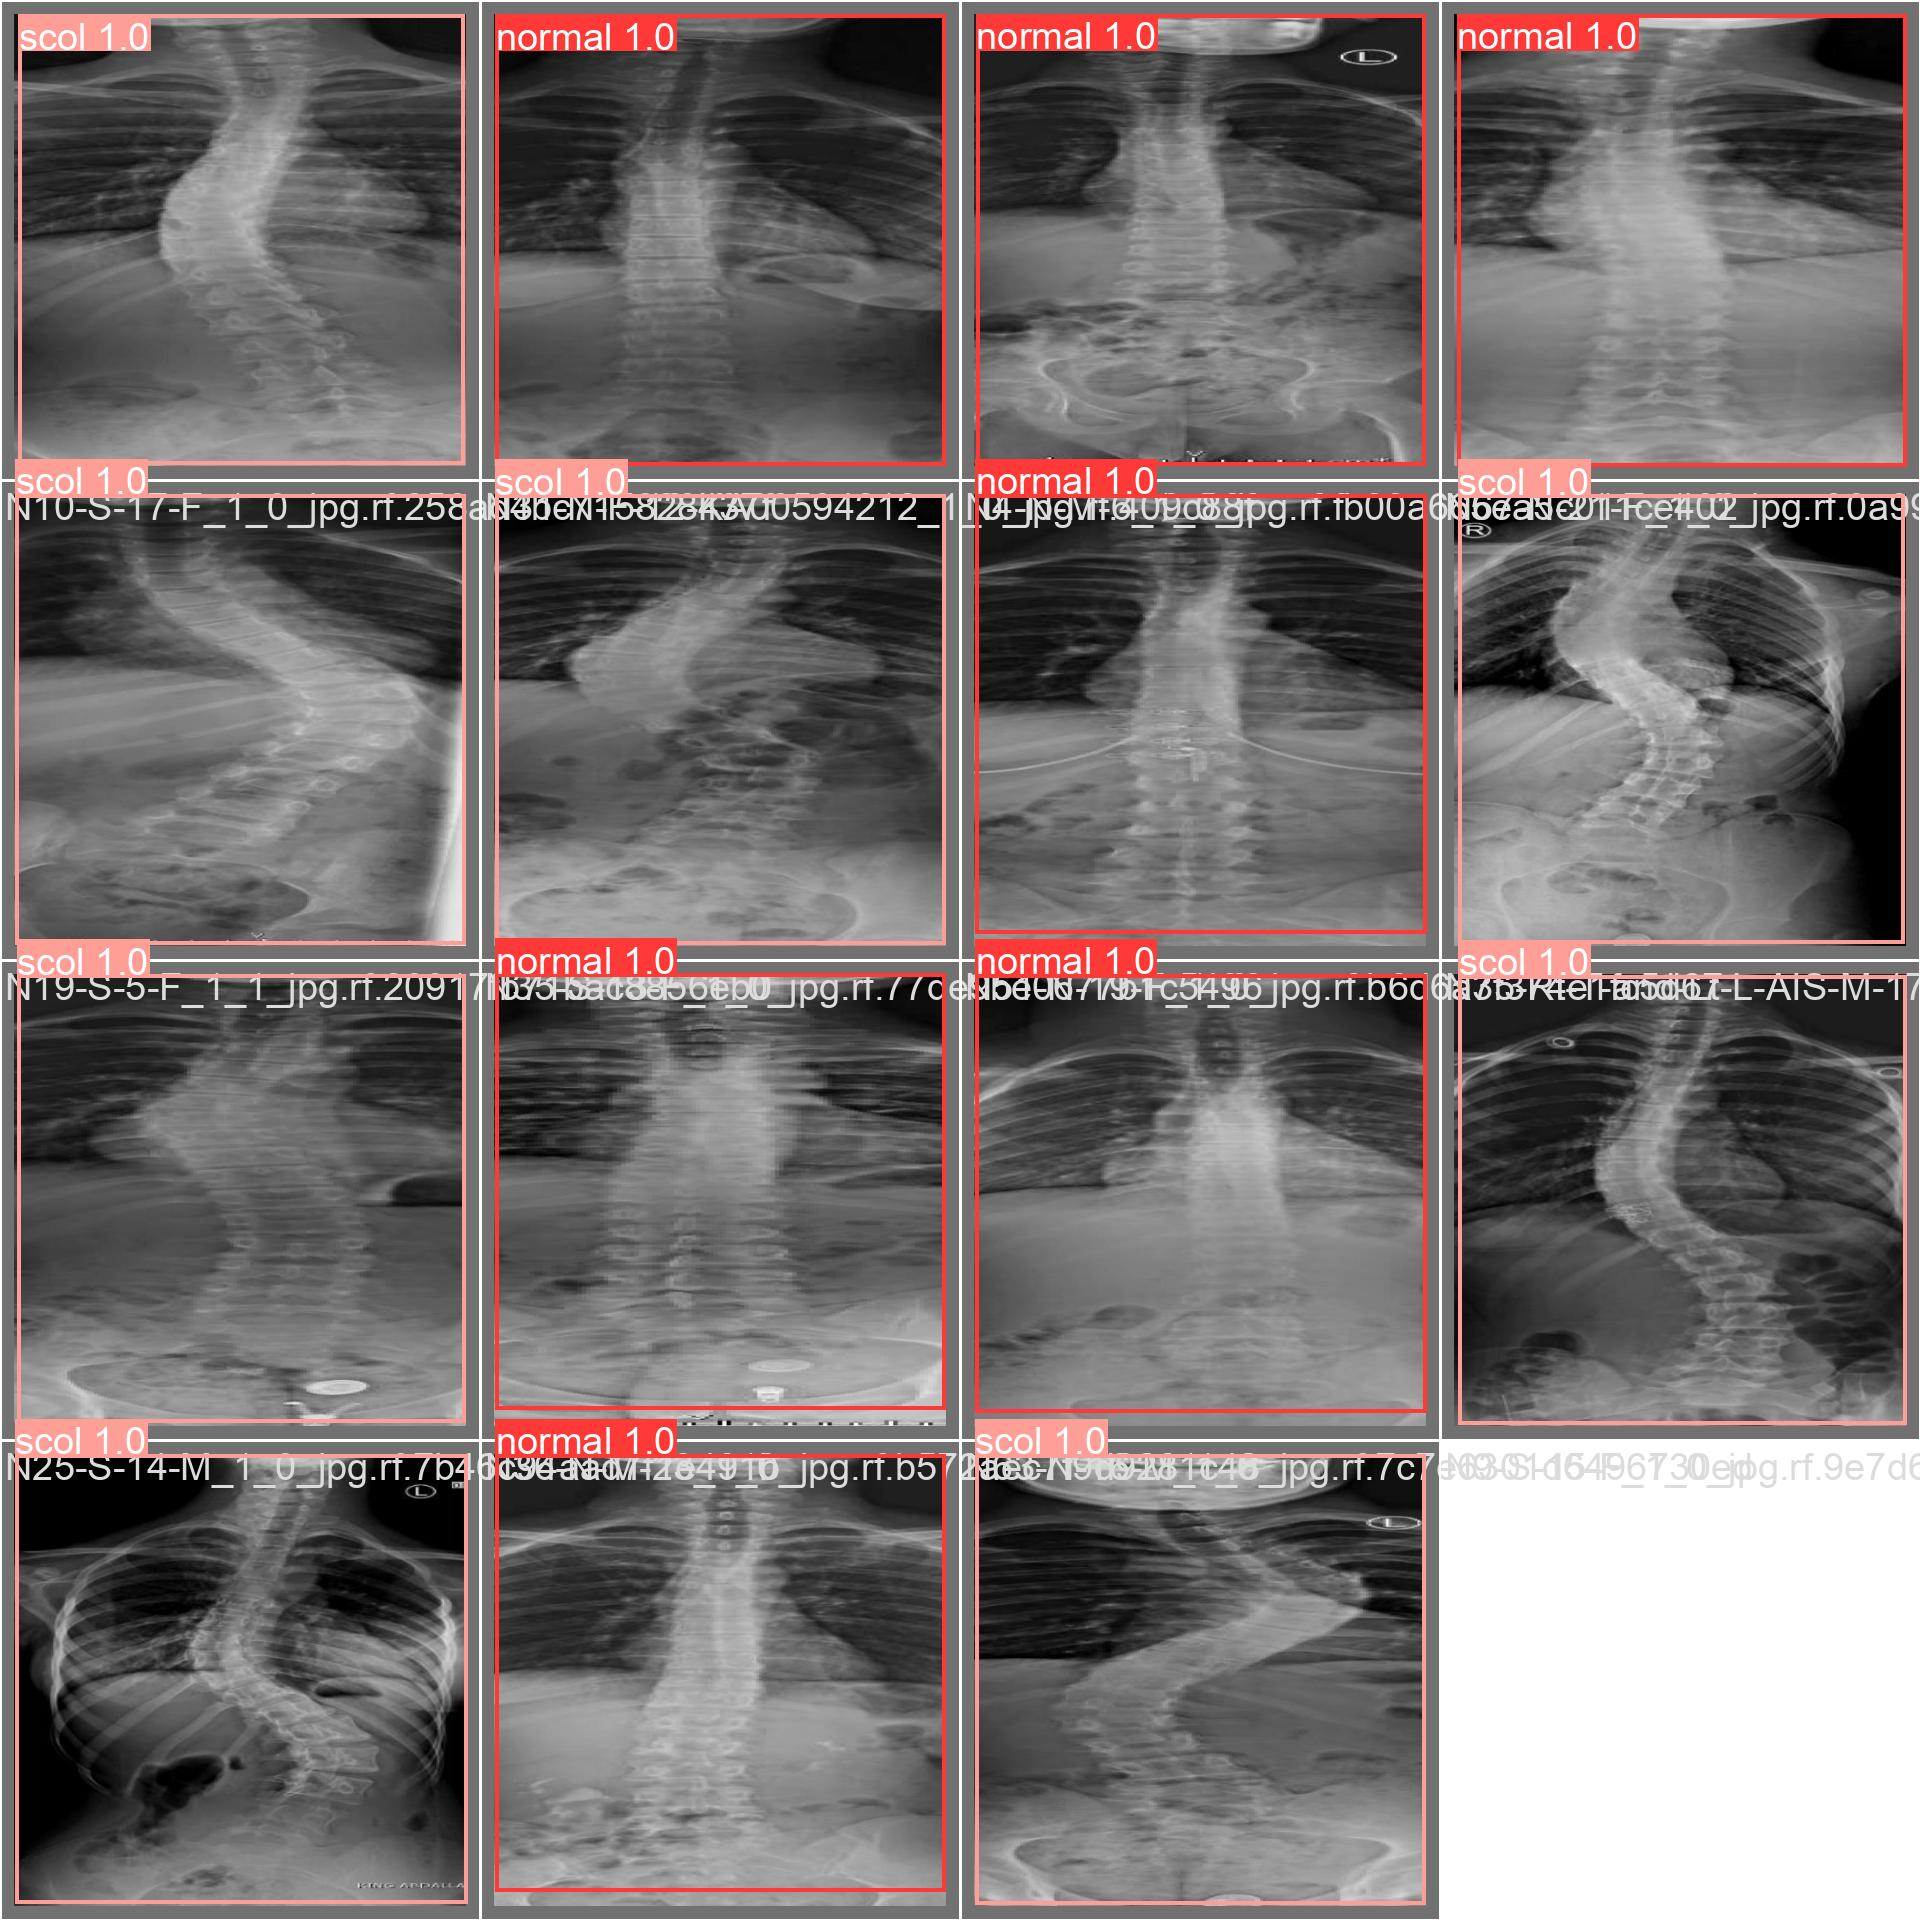

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/val_batch0_pred.jpg",width=600)

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!pip install ultralytics

In [ ]:
!pip install clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
from ultralytics.utils.callbacks import clearml

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


In [ ]:
import clearml

In [ ]:
!pip install clearml

In [ ]:
!pip show clearml

Name: clearml
Version: 1.13.2
Summary: ClearML - Auto-Magical Experiment Manager, Version Control, and MLOps for AI
Home-page: https://github.com/allegroai/clearml
Author: ClearML
Author-email: support@clear.ml
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: attrs, furl, jsonschema, numpy, pathlib2, Pillow, psutil, pyjwt, pyparsing, python-dateutil, PyYAML, referencing, requests, six, urllib3
Required-by: 


In [ ]:
from PIL import Image
from ultralytics import YOLO

# Ucitavamo nase najbolje tezine....odnosno nas model....moze i ovako...ili onaj sacuvani
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Detekcija na slici proba.jpg
results = model('/content/probna.jpg')

# Prikaz rezultata
for r in results:
    im_array = r.plot()  # plotuje se isto U BGR
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL slika
    im.show()  # prikaz slike
    im.save('results3.jpg')  # cuvaj se


image 1/1 /content/probna.jpg: 512x448 1 scol, 111.9ms
Speed: 2.6ms preprocess, 111.9ms inference, 8.4ms postprocess per image at shape (1, 3, 512, 448)
